# Reacher Task, Deep RL for Continuous Control
---

### 1. Import the Necessary Packages

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from spddpg_agent import Agent

### 2. Instantiate the Environment and Agent

In [2]:
env = UnityEnvironment(file_name="./Tennis_Windows_x86_64/Tennis.exe")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
START_DECAY = 10000
GOAL_SCORE = .5


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


### 3. Train the Agent with DDPG

Episode 100	Average Score: 0.01
Episode 200	Average Score: 0.01
Episode 300	Average Score: 0.01
Episode 400	Average Score: 0.03
Episode 500	Average Score: 0.03
Episode 600	Average Score: 0.01
Episode 700	Average Score: 0.03
Episode 800	Average Score: 0.06
Episode 900	Average Score: 0.11
Episode 1000	Average Score: 0.13
Episode 1100	Average Score: 0.18
Episode 1200	Average Score: 0.16
Episode 1300	Average Score: 0.43
Episode 1368	Average Score: 0.51Environment solved! achieved an average score of 30 over 100 episodes at episode 1368
Episode 1400	Average Score: 0.57
Episode 1500	Average Score: 0.43
Episode 1600	Average Score: 1.40
Episode 1700	Average Score: 1.19
Episode 1800	Average Score: 1.35
Episode 1900	Average Score: 1.61
Episode 2000	Average Score: 1.22
Episode 2100	Average Score: 1.08
Episode 2200	Average Score: 1.42
Episode 2300	Average Score: 1.20
Episode 2400	Average Score: 1.17
Episode 2500	Average Score: 1.40
Episode 2600	Average Score: 1.49
Episode 2700	Average Score: 1.63


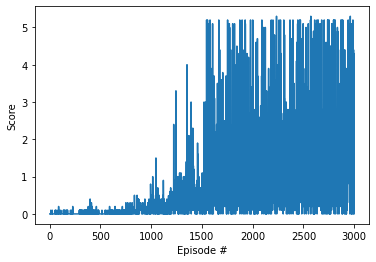

In [3]:
agent = Agent(state_size=24, action_size=2, random_seed=0)
def ddpg(n_episodes=3000, max_t=300, print_every=100):
    SOLVED = False
    scores_deque = deque(maxlen=print_every)
    scores = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        num_agents = len(env_info.agents)

        states = env_info.vector_observations
        agent.reset()
        score = 0

        while True:
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = np.array(env_info.rewards)
            dones = np.array(env_info.local_done)
            agent.step(states, actions, rewards, next_states, dones)
            states = next_states
            score += np.amax(rewards)
            # assumption, episode will terminate for both agents at the same time
            if True in dones:
                break 
        scores_deque.append(score)
        scores.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        if np.mean(scores_deque) >= GOAL_SCORE and not SOLVED:
            SOLVED = True
            print(f'Environment solved! achieved an average score of 30 over 100 episodes at episode {i_episode}')
            torch.save(agent.actor_local.state_dict(), 'checkpointactor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpointcritic.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            
    return scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [4]:
env.close()

### 4. Watch a Smart Agent!

In [3]:
agent = Agent(state_size=24, action_size=2, random_seed=0)

def run_agent(n_episodes=1, max_t=300, print_every=100):
    score = 0
    agent.actor_local.load_state_dict(torch.load('checkpointactor.pth'))
    agent.critic_local.load_state_dict(torch.load('checkpointcritic.pth'))

    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=False)[brain_name]
        state = env_info.vector_observations
        agent.reset()

        while True:
            action = agent.act(state, add_noise=False, decay_noise=False)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            state = next_state
            score += reward
            if done:
                break 
    return score

score = run_agent()

print(f"Agent Complete Episode With a Score Of: {score}")

NameError: name 'agent' is not defined